In [42]:
import pandas as pd
import matplotlib

온라인_햇살론_고객정보 = pd.read_excel('../../../온라인햇살론_분석정보.xlsx')

print(온라인_햇살론_고객정보.head(10))

columns_to_keep = ['PRE_LMT', 'PRE_RT', 'GOODS_CD', 'RRC_CD', 'HAC_CD', 'LU0024101', 'LU0024201',
                   'LS0000180', 'CL0631905', 'CL0631906', 'L2A000105', 'L00080002',
                   'LA6000005', 'L22001800', 'L22002000', 'SALE_TRM',
                   'LC0099024',
                   'LA1200018']

print(온라인_햇살론_고객정보.value_counts())



   Unnamed: 0   PRE_LMT  PRE_RT  GOODS_CD  RRC_CD  HAC_CD  LU0024101  \
0           2  12000000    7.21    760143      17       1      34000   
1           5  13000000    6.21    760143      20       1      12397   
2           8   9000000    6.32    760143      18       1      84889   
3           9  11000000    6.84    760143      17       1      17816   
4          10  13000000    6.24    760143      17       1      39211   
5          11  11000000    6.68    760143      17       1      70000   
6          12  15000000    6.93    760143      17       1      38700   
7          13  12000000    6.22    760143      13       1      28961   
8          14  12000000    6.75    760143      18       1       8617   
9          16  12000000    6.31    760143      16       1      47914   

   LU0024201  LS0000180  CL0631905  CL0631906  L2A000105  L00080002  \
0          2          7         19          0        937          0   
1          4         56         33          0        141         

In [6]:
전방10개_데이터 = 온라인_햇살론_고객정보.head(10)

<AxesSubplot:>

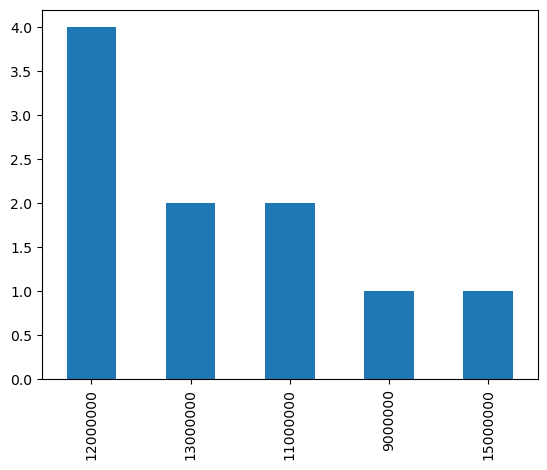

In [8]:
전방10개_데이터['PRE_LMT'].value_counts().plot(kind="bar")

<AxesSubplot:>

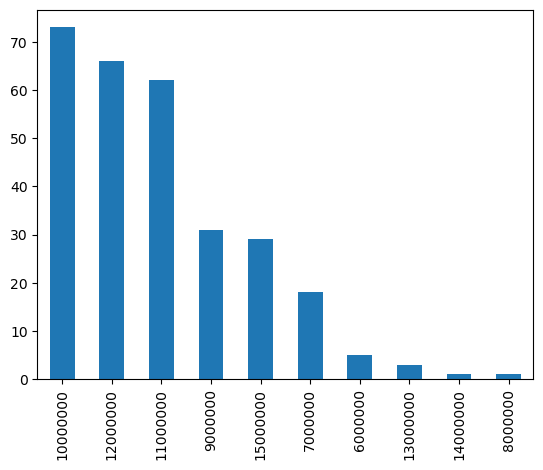

In [9]:
온라인_햇살론_고객정보['PRE_LMT'].value_counts().plot(kind="bar")

<AxesSubplot:>

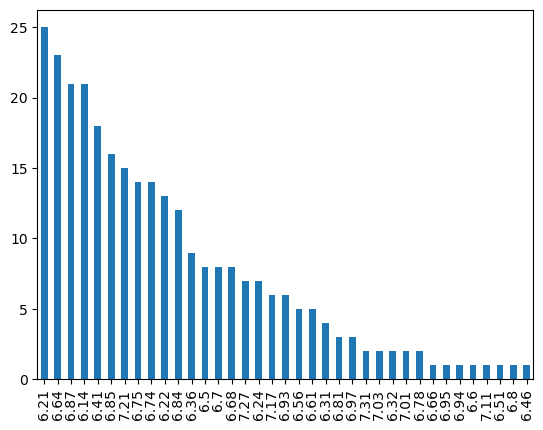

In [10]:
온라인_햇살론_고객정보['PRE_RT'].value_counts().plot(kind="bar")

<AxesSubplot:>

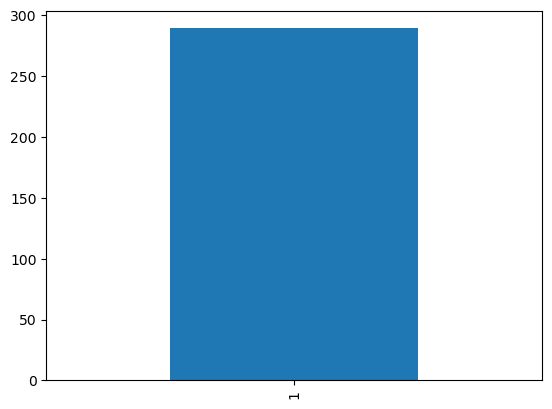

In [11]:
온라인_햇살론_고객정보['HAC_CD'].value_counts().plot(kind="bar") 

In [12]:
온라인_햇살론_고객정보.dtypes

Unnamed: 0      int64
PRE_LMT         int64
PRE_RT        float64
GOODS_CD        int64
RRC_CD          int64
HAC_CD          int64
LU0024101       int64
LU0024201       int64
LS0000180       int64
CL0631905       int64
CL0631906       int64
L2A000105       int64
L00080002       int64
LA6000005       int64
L22001800       int64
L22002000       int64
SALE_TRM        int64
LC0099024       int64
LA1200018       int64
dtype: object

In [13]:
print(온라인_햇살론_고객정보['PRE_LMT'].value_counts())

10000000    73
12000000    66
11000000    62
9000000     31
15000000    29
7000000     18
6000000      5
13000000     3
14000000     1
8000000      1
Name: PRE_LMT, dtype: int64


In [14]:
print(len(온라인_햇살론_고객정보['PRE_LMT'].value_counts()))

10


In [16]:
y = 온라인_햇살론_고객정보['PRE_LMT']
print(y)

0      12000000
1      13000000
2       9000000
3      11000000
4      13000000
         ...   
284    10000000
285     7000000
286    10000000
287    11000000
288     9000000
Name: PRE_LMT, Length: 289, dtype: int64


In [25]:
#PRE_RT    L00080002   L22001800  L22002000
# 내부적으로 vector와 matrix의 연산이기 때문에 차원이 같아야 합니다.
# y값에 해당하는 Length와 X 값에서 나오는 rows의 개수가 같아야 합니다.
columns_to_keep = ['PRE_RT', 'L00080002', 'L22001800', 'L22002000']
X = 온라인_햇살론_고객정보[columns_to_keep]
print(X)

     PRE_RT  L00080002  L22001800  L22002000
0      7.21          0          0          0
1      6.21          0       7050      12397
2      6.32       4807       9607      28792
3      6.84      13079       4737       4737
4      6.24      23013          0          0
..      ...        ...        ...        ...
284    6.87          0       2992       2992
285    6.41          0          0          0
286    6.36          0          0          0
287    6.84          0          0          0
288    7.31          0          0          0

[289 rows x 4 columns]


In [27]:
from sklearn.model_selection import train_test_split
# test_size는 전체 데이터 집합의 몇 %를
# 실제 비교 데이터 및 테스트 데이터로 분할할 것인가를 결정함
# 테스트에 20%를 사용한다는 뜻임
# random_state의 경우엔 재현율인데 보편적으로 42를 많이 사용함
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [28]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (231, 4)
X_test shape: (58, 4)
y_train shape: (231,)
y_test shape: (58,)


In [30]:
from sklearn.linear_model import LogisticRegression

# y = 1 / (1 + e^-x)
model = LogisticRegression(random_state = 42)

In [32]:
y_prediction = model.predict(X_test)
print(y_prediction)

[ 9000000 10000000 12000000 12000000 10000000  9000000 10000000 12000000
 10000000 12000000 10000000 12000000 10000000 12000000 10000000 12000000
 12000000 12000000 10000000 12000000 12000000 10000000 12000000 12000000
 10000000 12000000 10000000 12000000 10000000 10000000 12000000 10000000
 10000000 12000000 10000000 10000000 10000000 12000000 12000000 10000000
 12000000 10000000 11000000 10000000 12000000 10000000  9000000 15000000
 12000000 12000000 10000000 10000000 10000000 12000000 10000000 10000000
 12000000 12000000]


In [35]:
from sklearn import metrics

accuracy = metrics.accuracy_score(
    y_pred = y_prediction, y_true = y_test
)

print(f'모델의 정확도: {accuracy * 100:.4f}%')

모델의 정확도: 31.0345%


In [39]:
prediction, recall, fscore, _ = \
    metrics.precision_recall_fscore_support(
        y_pred = y_prediction, y_true = y_test, average = 'micro'
    )

print(
    f'정밀도 : {prediction:.4f}\n' +
    f'재현률 : {recall:.4f}\n' +
    f'fscore : {fscore:.4f}\n'
)

정밀도 : 0.3103
재현률 : 0.3103
fscore : 0.3103



In [41]:
coef_list = [f'{feature}: {coef}'
    for coef, feature in sorted(
        zip(
            model.coef_[0],
            X_train.columns.values.tolist()
        )
    )
]

# y = ax + b
# a0 * PRE_RT = a1 * L22002000 + a2 * L22001800 + a3 * L0080002
for item in coef_list:
    print(item)

PRE_RT: -0.13124430795824144
L22002000: -4.1247051584373146e-05
L22001800: -1.1420332090588668e-05
L00080002: 4.4213330336659385e-05
